In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('starbucks-menu-nutrition-drinks.csv')


In [8]:
df.head()


,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [9]:
df.shape

(177, 7)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  177 non-null    object
 1   Calories    177 non-null    object
 2   Fat (g)     177 non-null    object
 3   Carb. (g)   177 non-null    object
 4   Fiber (g)   177 non-null    object
 5   Protein     177 non-null    object
 6   Sodium      177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [11]:
df.describe()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
count,177,177,177,177,177,177,177
unique,154,30,15,34,8,17,25
top,Tazo® Bottled Organic Iced Black Tea,-,-,-,-,-,-
freq,2,85,85,85,85,85,85


In [23]:
print(df['Calories'].dtype)  # Check the current data type of 'Calories'


object


In [24]:
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')


In [25]:
#Top 3 Starbucks drinks with the highest calories count 
df = df.dropna(subset=['Calories'])
top_3_highest_calories_drinks = df.nlargest(3, 'Calories')
print("Top 3 Starbucks drinks with the most calories")
print(top_3_highest_calories_drinks)

Top 3 Starbucks drinks with the most calories
                                     Unnamed: 0  Calories Fat (g) Carb. (g)  \
110          Starbucks® Signature Hot Chocolate     430.0      26        45   
139                       White Chocolate Mocha     360.0      11        53   
146  Cinnamon Dolce Frappuccino® Blended Coffee     350.0     4.5        64   

    Fiber (g) Protein Sodium  
110         5      12    115  
139         0      14    240  
146         0      15      0  


In [26]:
#Bottom 3 Starbucks drinks with the least calories count
bottom_3_lowest_calories_drinks = df.nsmallest(3,'Calories')
print('Bottom 3 Starbucks drinks with the least calories')
print(bottom_3_lowest_calories_drinks)

Bottom 3 Starbucks drinks with the least calories
                        Unnamed: 0  Calories Fat (g) Carb. (g) Fiber (g)  \
9                      Iced Coffee       0.0       0         0         0   
103  Nariño 70 Cold Brew with Milk       0.0       0         0         0   
94                    Blonde Roast       5.0       0         0         0   

    Protein Sodium  
9         0      0  
103       0      0  
94        1     10  


In [27]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Add a column to identify the type of drink
top_3_highest_calories_drinks['Type'] = 'Top 3 Highest Calories'
bottom_3_lowest_calories_drinks['Type'] = 'Bottom 3 Lowest Calories'

# Concatenate both DataFrames
combined_df = pd.concat([top_3_highest_calories_drinks, bottom_3_lowest_calories_drinks])

In [30]:
print(combined_df)

                                     Unnamed: 0  Calories Fat (g) Carb. (g)  \
110          Starbucks® Signature Hot Chocolate     430.0      26        45   
139                       White Chocolate Mocha     360.0      11        53   
146  Cinnamon Dolce Frappuccino® Blended Coffee     350.0     4.5        64   
9                                   Iced Coffee       0.0       0         0   
103               Nariño 70 Cold Brew with Milk       0.0       0         0   
94                                 Blonde Roast       5.0       0         0   

    Fiber (g) Protein Sodium                      Type  
110         5      12    115    Top 3 Highest Calories  
139         0      14    240    Top 3 Highest Calories  
146         0      15      0    Top 3 Highest Calories  
9           0       0      0  Bottom 3 Lowest Calories  
103         0       0      0  Bottom 3 Lowest Calories  
94          0       1     10  Bottom 3 Lowest Calories  


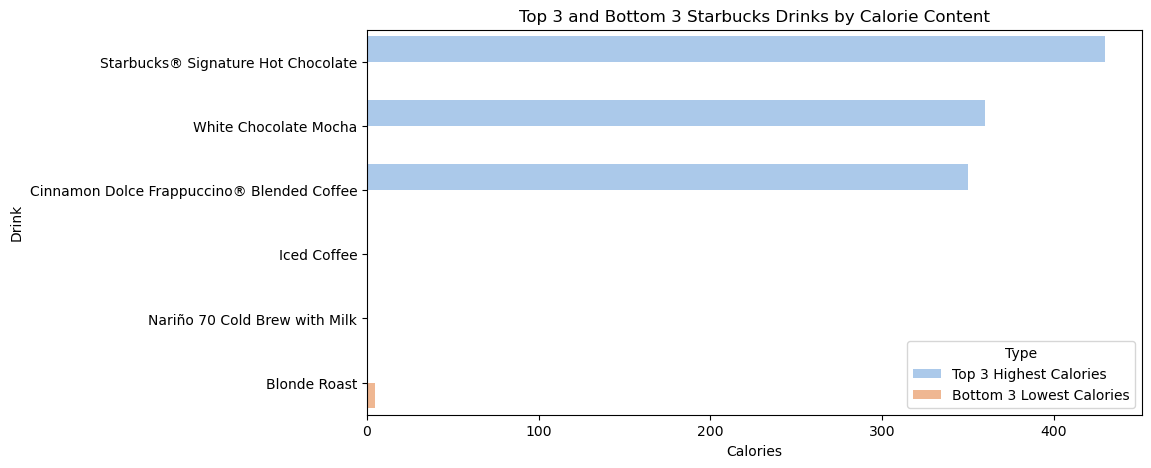

In [32]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 5))

# Create the bar plot
sns.barplot(x='Calories', y='Unnamed: 0', hue='Type', data=combined_df, palette='pastel')

# Add titles and labels
plt.title('Top 3 and Bottom 3 Starbucks Drinks by Calorie Content')
plt.xlabel('Calories')
plt.ylabel('Drink')

# Show the plot
plt.show()


In [36]:
# Convert nutritional columns to numeric, coercing errors to NaN
numeric_columns = ['Fat (g)', 'Carb. (g)','Sodium', 'Protein', 'Fiber (g)']
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with NaN values in any of the nutritional columns
df = df.dropna(subset=numeric_columns)

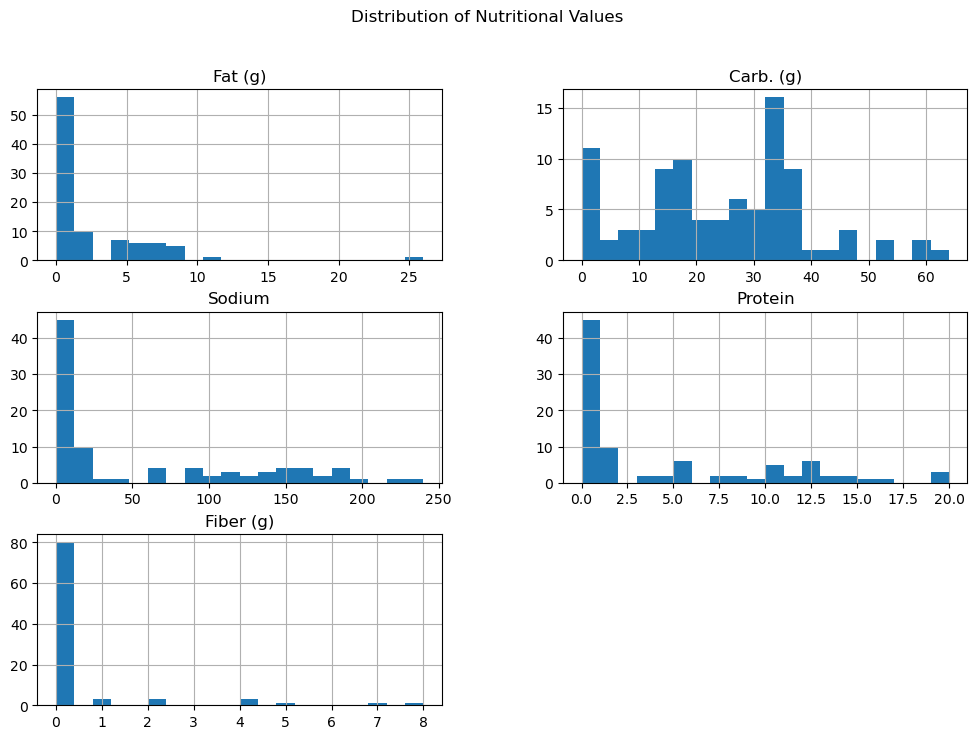

In [37]:
df[['Fat (g)', 'Carb. (g)', 'Sodium', 'Protein', 'Fiber (g)']].hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Nutritional Values')
plt.show()


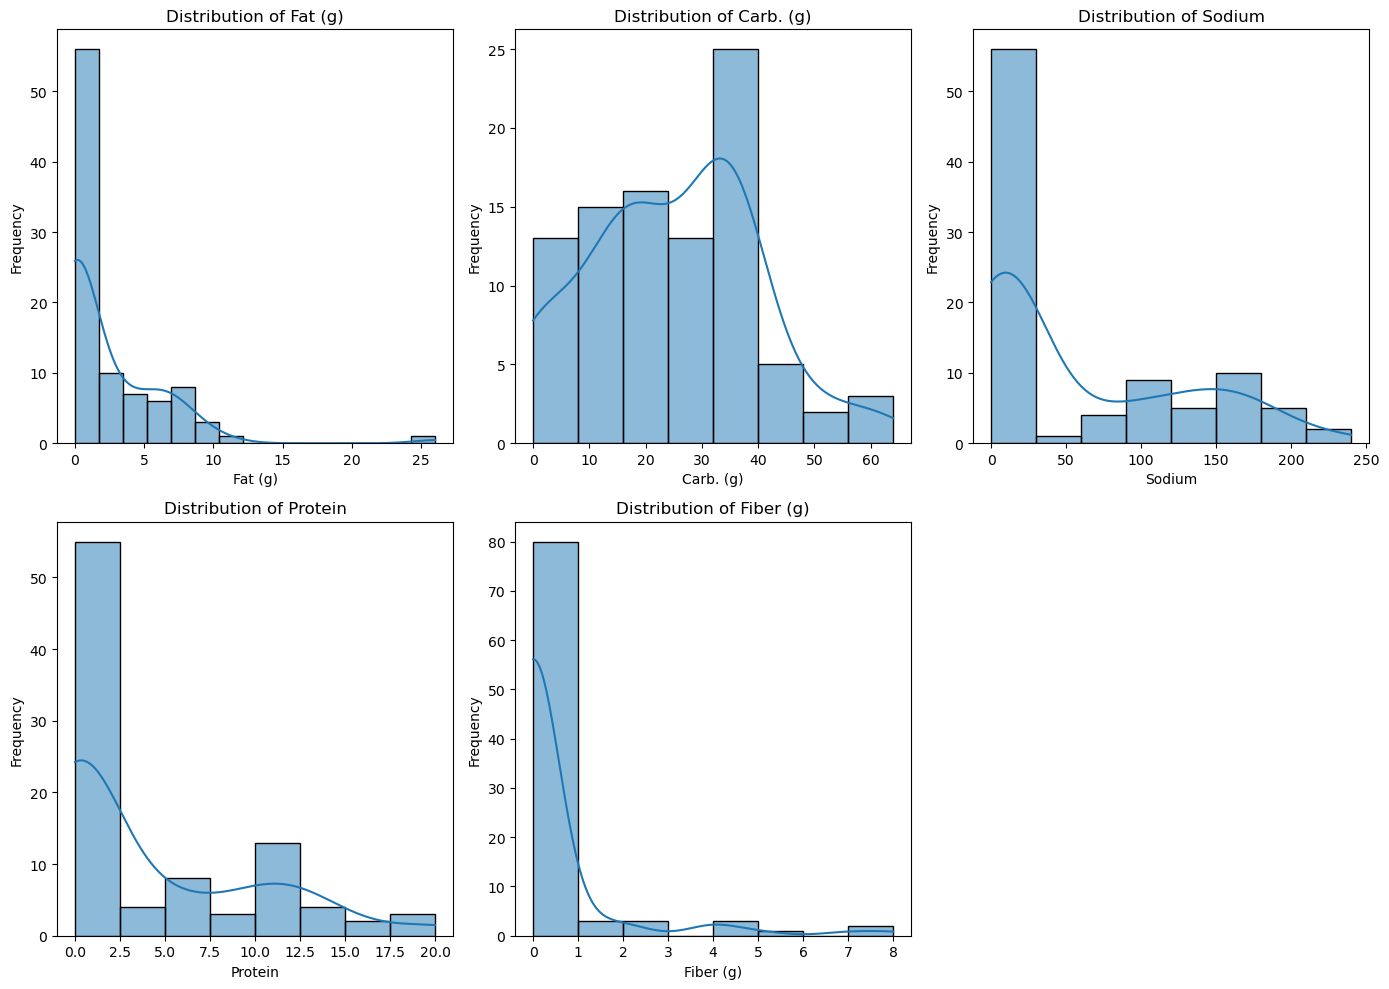

In [38]:
plt.figure(figsize=(14, 10))

# Plot histograms for each nutritional value
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, subplot i (adjusted to 3 columns)
    sns.histplot(df[column], kde=True)  # Histogram with KDE (Kernel Density Estimate)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [39]:
print(df[numeric_columns].describe())


         Fat (g)  Carb. (g)      Sodium    Protein  Fiber (g)
count  92.000000  92.000000   92.000000  92.000000  92.000000
mean    2.336957  24.739130   57.934783   4.152174   0.445652
std     3.887928  15.214849   68.384627   5.691588   1.417040
min     0.000000   0.000000    0.000000   0.000000   0.000000
25%     0.000000  14.750000   10.000000   0.000000   0.000000
50%     0.000000  25.500000   15.000000   1.000000   0.000000
75%     4.125000  35.000000  115.000000   8.250000   0.000000
max    26.000000  64.000000  240.000000  20.000000   8.000000


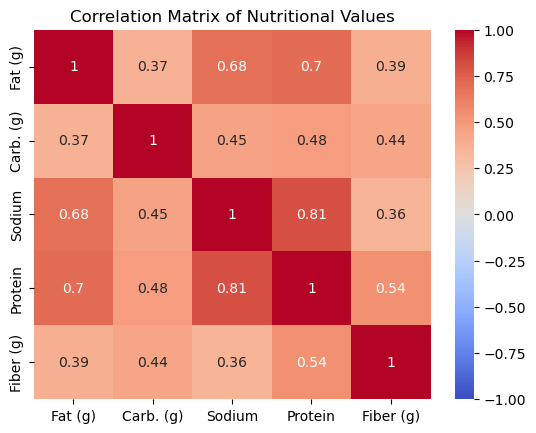

In [40]:
#Find correlations 
corr = df[['Fat (g)', 'Carb. (g)','Sodium', 'Protein', 'Fiber (g)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Nutritional Values')
plt.show()

In [41]:
#Highest and Lowest Fat Contents
top_3_highest_fat_drinks = df.nlargest(3, 'Fat (g)')
bottom_3_lowest_fat_drinks = df.nsmallest(3, 'Fat (g)')
print("Top 3 drinks with the highest fat content:")
print(top_3_highest_fat_drinks)
print("Bottom 3 drinks with the lowest fat content:")
print(bottom_3_lowest_fat_drinks)


Top 3 drinks with the highest fat content:
                             Unnamed: 0  Calories  Fat (g)  Carb. (g)  \
110  Starbucks® Signature Hot Chocolate     430.0     26.0         45   
139               White Chocolate Mocha     360.0     11.0         53   
109                       Hot Chocolate     320.0      9.0         47   

     Fiber (g)  Protein  Sodium  
110          5       12     115  
139          0       14     240  
109          4       14     160  
Bottom 3 drinks with the lowest fat content:
                                          Unnamed: 0  Calories  Fat (g)  \
0           Cool Lime Starbucks Refreshers™ Beverage      45.0      0.0   
3     Strawberry Acai Starbucks Refreshers™ Beverage      80.0      0.0   
4  Very Berry Hibiscus Starbucks Refreshers™ Beve...      60.0      0.0   

   Carb. (g)  Fiber (g)  Protein  Sodium  
0         11          0        0      10  
3         18          1        0      10  
4         14          1        0      10  


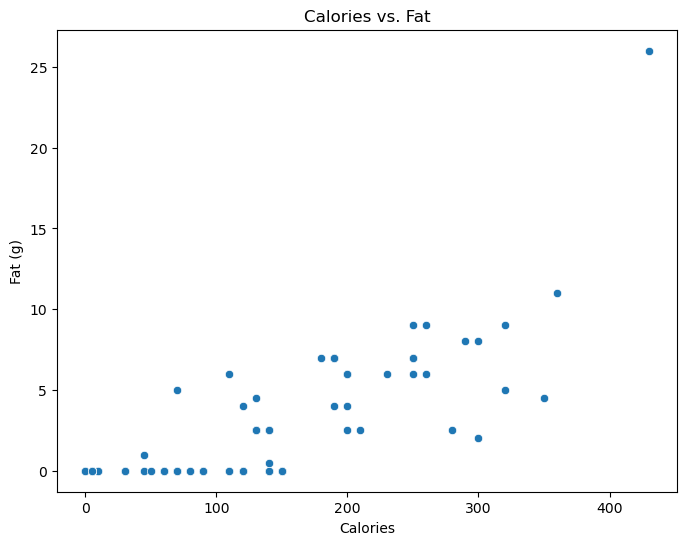

In [46]:
#scatterplot of fat vs. calories
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Calories', y='Fat (g)', data=df)
plt.title('Calories vs. Fat')
plt.xlabel('Calories')
plt.ylabel('Fat (g)')
plt.show()

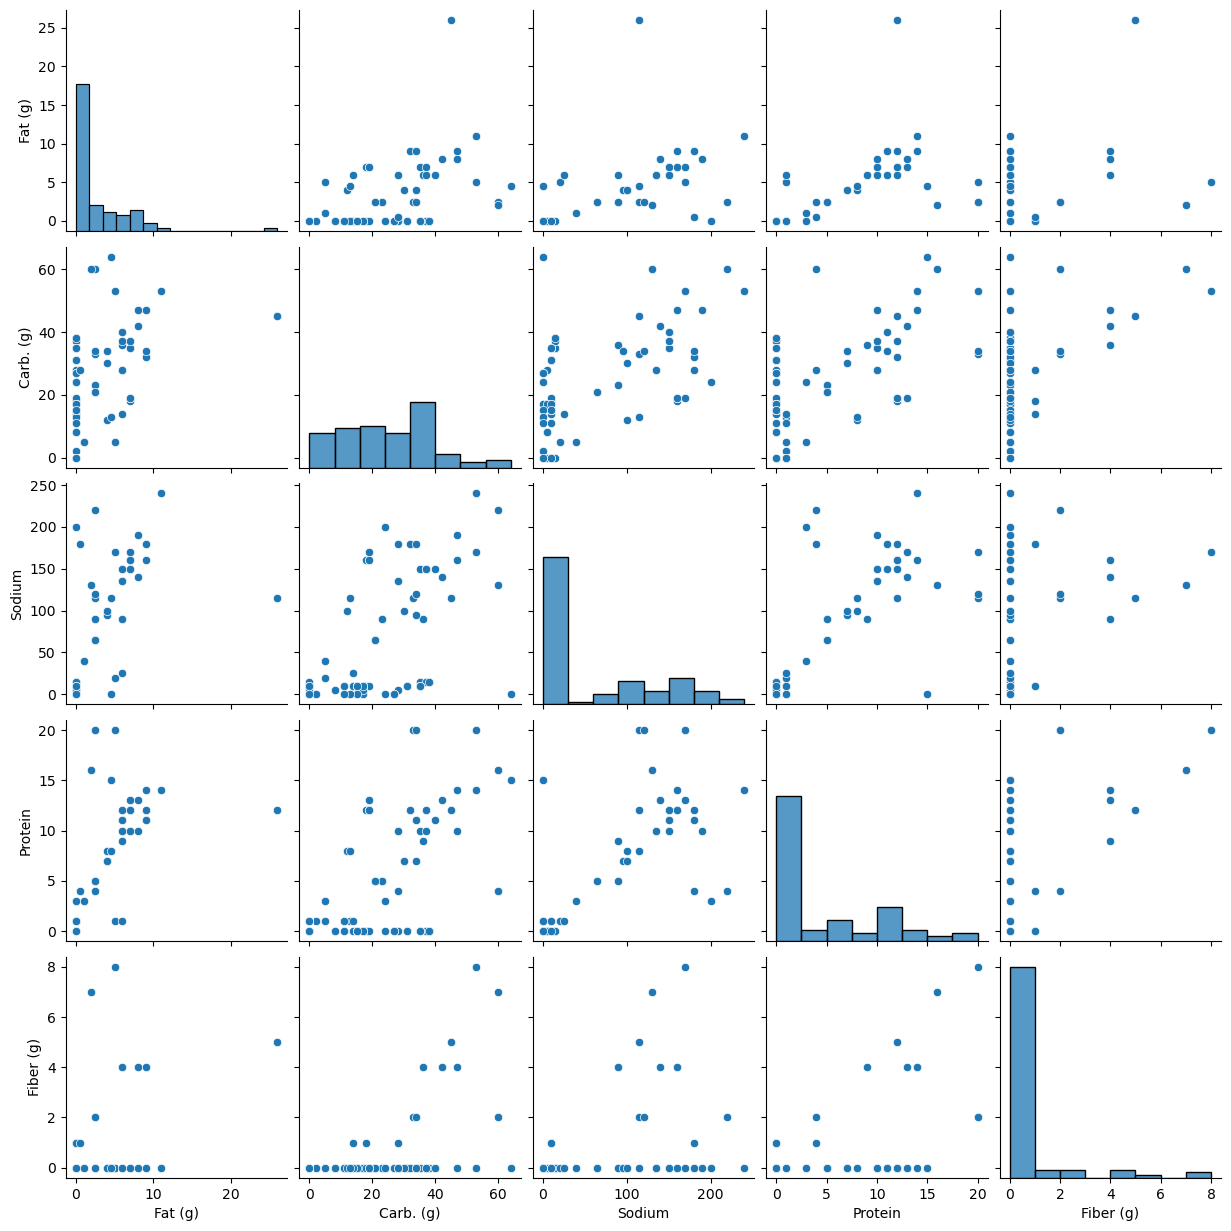

In [47]:
#pairplot
sns.pairplot(df[['Fat (g)', 'Carb. (g)','Sodium', 'Protein', 'Fiber (g)']])
plt.show()
